In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 99

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop('Id',axis=1, inplace=True)

In [4]:
df.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

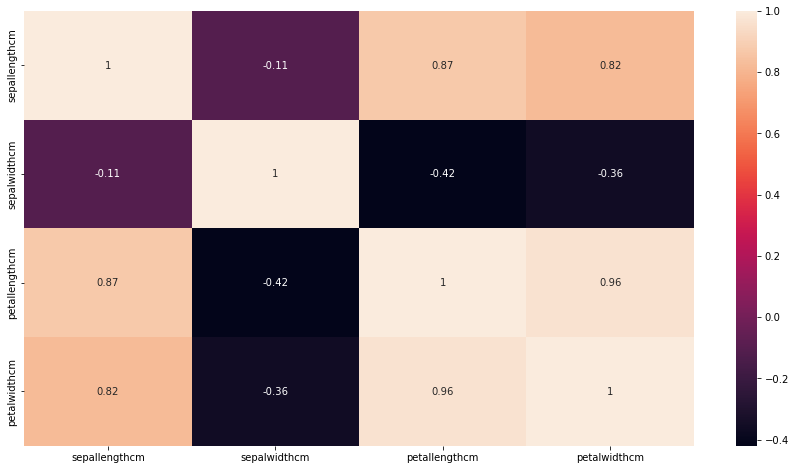

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)

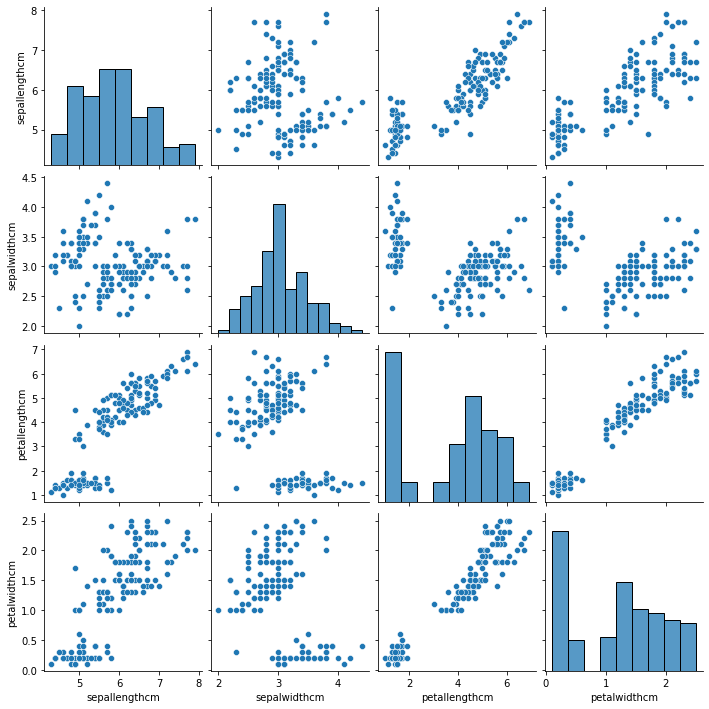

In [8]:
sns.pairplot(df)

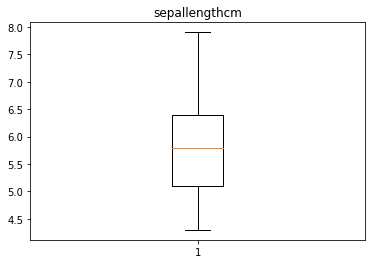

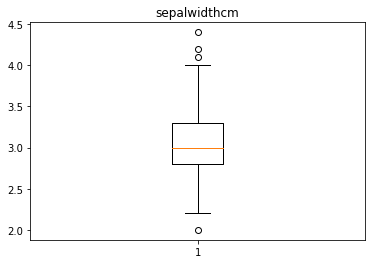

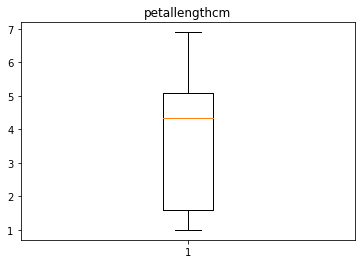

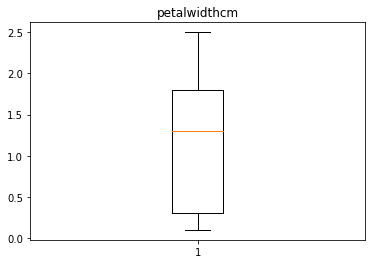

In [9]:
for i in df.columns[:-1]:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [10]:
# there are outliers in "sepalwidthcm" column

q1,q3=df['sepalwidthcm'].quantile([.25,.75])
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
    
df['sepalwidthcm']=np.clip(df['sepalwidthcm'],a_min=lower,a_max=upper)

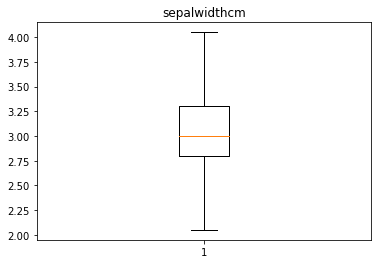

In [11]:
plt.boxplot(df['sepalwidthcm'])
plt.title('sepalwidthcm')
plt.show()

In [12]:
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
X = df.iloc[:,:-1]
X

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
df_scaled = pd.DataFrame(X, columns=df.columns[:-1])
df_scaled

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


### PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [17]:
pca.explained_variance_

array([2.9301216 , 0.92687459, 0.14902734, 0.0208221 ])

<BarContainer object of 4 artists>

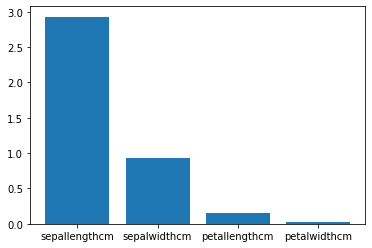

In [18]:
plt.bar(height=pca.explained_variance_, x=df_scaled.columns)

In [19]:
cumulative = np.cumsum(pca.explained_variance_)
cumulative

array([2.9301216 , 3.85699619, 4.00602354, 4.02684564])

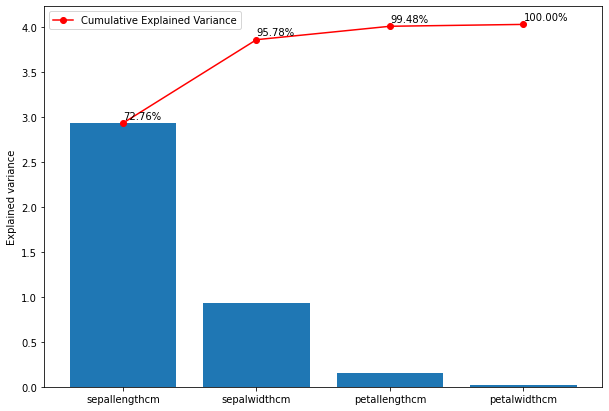

In [20]:
plt.figure(figsize=(10,7))
plt.bar(height=pca.explained_variance_, x=df_scaled.columns,)
plt.ylabel('Explained variance')

plt.plot(df_scaled.columns, cumulative, c='red', marker= 'o',
         label="Cumulative Explained Variance")

for i in range(len(df_scaled.columns)):
    plt.annotate("{:.2%}".format(cumulative[i]/cumulative[-1]), (df_scaled.columns[i], cumulative[i]+0.05))
    
plt.legend(loc='upper left')

In [21]:
df_scaled

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


### K - Means

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_pred = kmeans.fit_predict(df_scaled)
kmeans_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [25]:
df['species_kmeans'] = kmeans_pred
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,species_kmeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [24]:
# we have to determine that which number represents which category of iris flowers

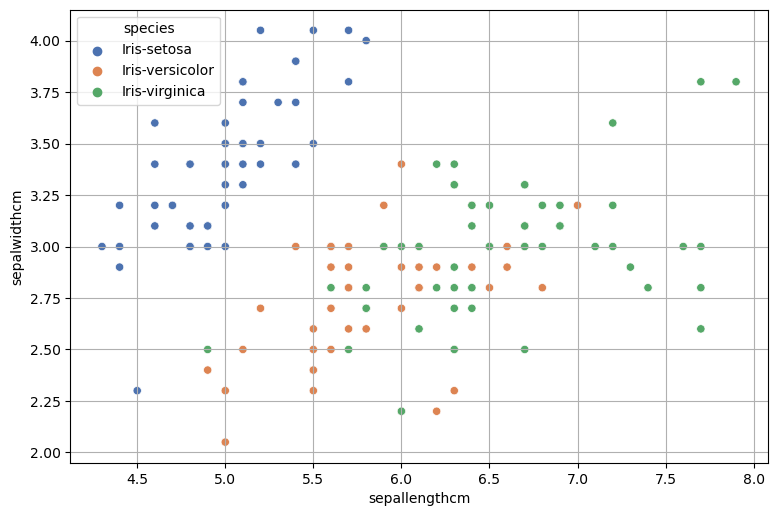

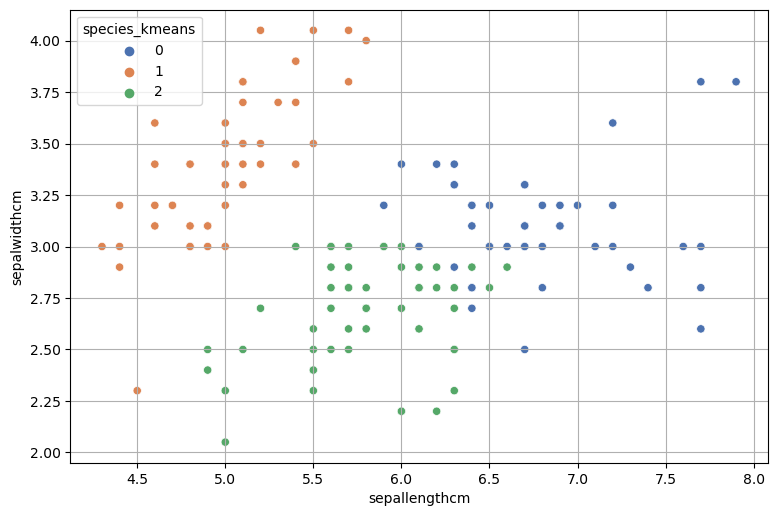

In [26]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='sepalwidthcm',hue='species', palette='deep')
plt.grid()
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='sepalwidthcm',hue='species_kmeans', palette='deep')
plt.grid()

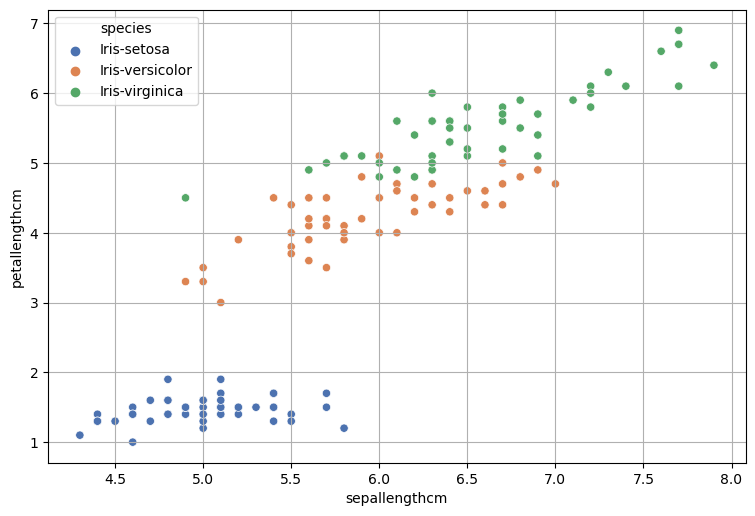

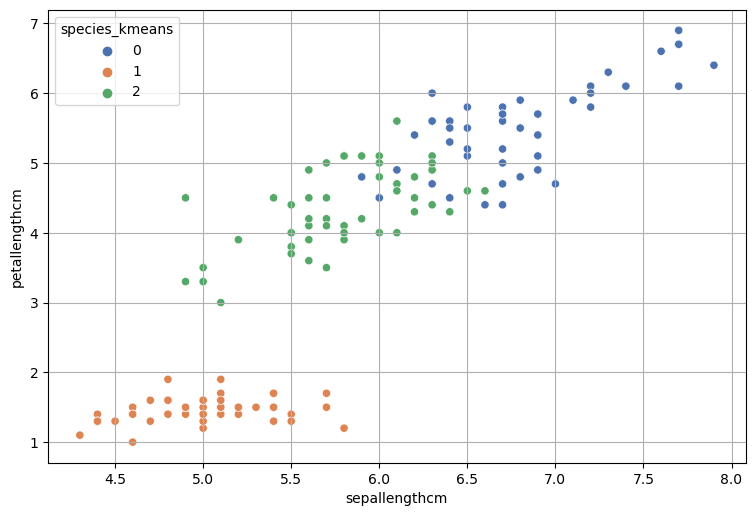

In [27]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='petallengthcm',hue='species', palette='deep')
plt.grid()
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='petallengthcm',hue='species_kmeans', palette='deep')
plt.grid()

In [28]:
df['species_kmeans'].replace({0:'Iris-virginica', 1:'Iris-setosa', 2:'Iris-versicolor'},inplace=True)

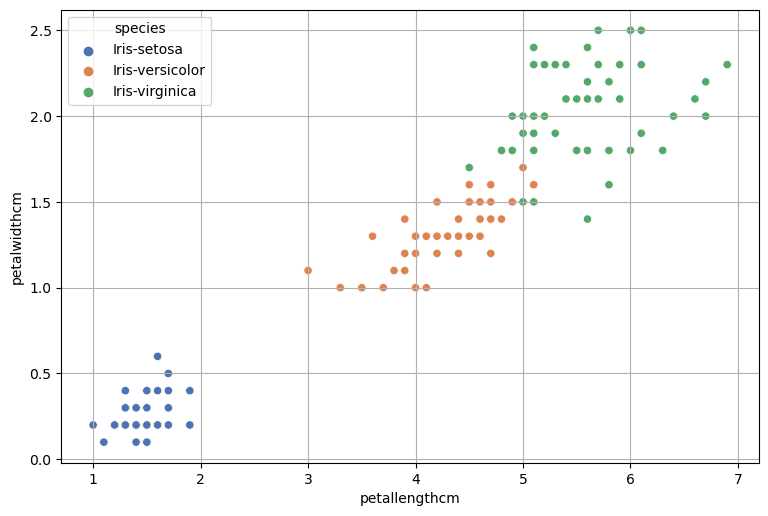

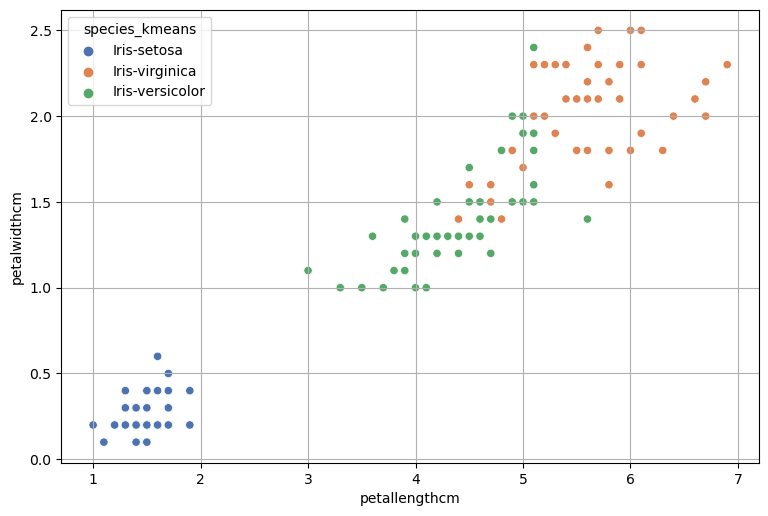

In [29]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='petallengthcm',y='petalwidthcm',hue='species', palette='deep')
plt.grid()
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='petallengthcm',y='petalwidthcm',hue='species_kmeans', palette='deep')
plt.grid()

### Hierarchical clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

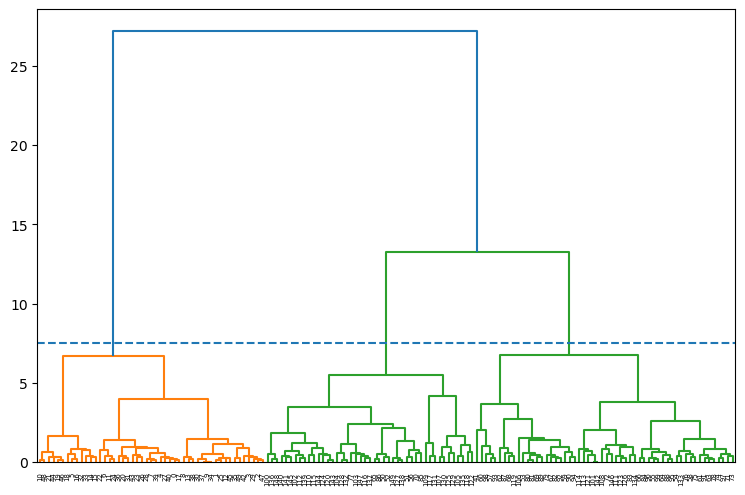

In [31]:
plt.figure(figsize=(9,6), dpi=100)
dendrogram(linkage(df_scaled, method='ward', metric='euclidean'))
plt.axhline(linestyle='--', y=7.5)
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
# affinity='euclidean', linkage='ward' by default
hc = AgglomerativeClustering(n_clusters=3)
hc_pred = hc.fit_predict(df_scaled)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [35]:
df['species_hc'] = hc_pred
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species,species_kmeans,species_hc
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor,0
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,2


In [34]:
# we have to determine that which number represents which category of iris flowers for this method too.

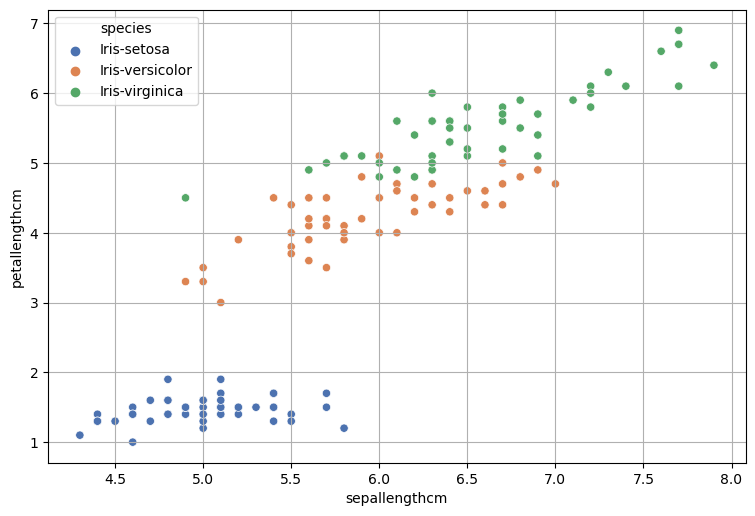

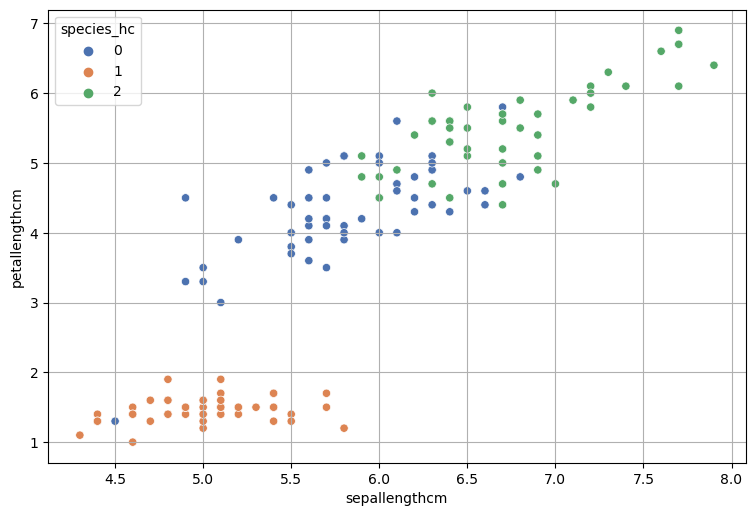

In [38]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='petallengthcm',hue='species', palette='deep')
plt.grid()
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='sepallengthcm',y='petallengthcm',hue='species_hc', palette='deep')
plt.grid()

In [39]:
df['species_hc'].replace({0:'Iris-versicolor', 1:'Iris-setosa', 2:'Iris-virginica'},inplace=True)

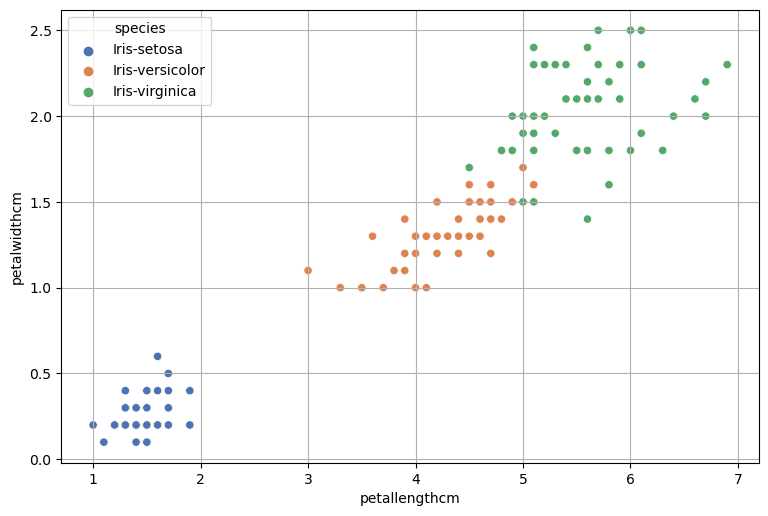

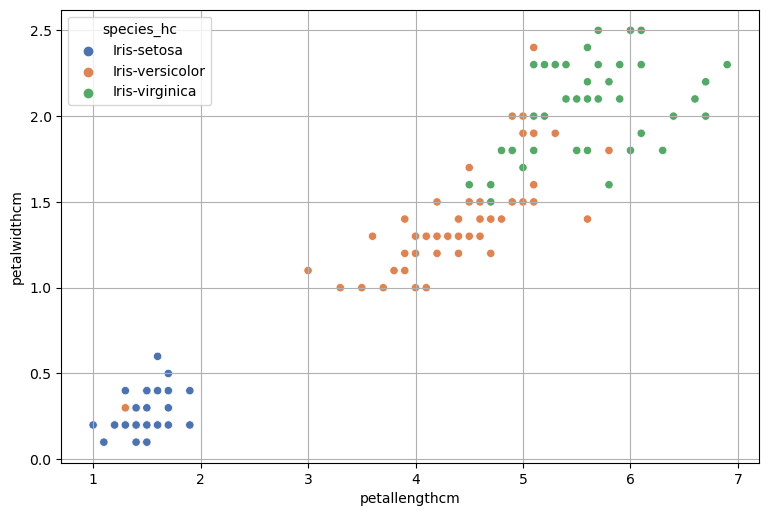

In [40]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='petallengthcm',y='petalwidthcm',hue='species', palette='deep')
plt.grid()
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='petallengthcm',y='petalwidthcm',hue='species_hc', palette='deep')
plt.grid()